In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
passData = pd.read_csv('./combined_mistakes.csv')
passData

,Event,Player,Team,Outcome,X,Y,endX,endY
0,Pass,89401,13,Successful,37.0,35.8,22.7,66.7
1,Pass,89401,13,Successful,15.6,29.7,27.8,1.7
2,Pass,89401,13,Successful,27.3,9.4,34.3,16.8
3,Pass,89401,13,Successful,26.1,32.2,22.3,70.3
4,Pass,89401,13,Successful,41.2,22.2,29.8,51.0
...,...,...,...,...,...,...,...,...
4728,Pass,89401,13,Unsuccessful,41.4,78.1,70.0,86.2
4729,Pass,89401,13,Successful,35.3,79.9,11.1,55.4
4730,Pass,89401,13,Successful,69.0,81.5,76.9,87.4
4731,Pass,89401,13,Successful,48.2,46.4,51.5,28.9


In [33]:
passData.Event.value_counts()

Pass         4524
BallTouch     197
Error          12
Name: Event, dtype: int64

In [34]:
passData['xM'] = passData.X / 100 * 104
passData['yM'] = passData.Y / 100 * 68

In [35]:
err = passData['Event'] == 'Error'
error = passData[err]
error

,Event,Player,Team,Outcome,X,Y,endX,endY,xM,yM
54,Error,89401,13,Successful,33.2,4.6,NaN,NaN,34.528,3.128
1322,Error,89401,13,Successful,19.2,96.3,NaN,NaN,19.968,65.484
1525,Error,89401,13,Successful,33.2,4.6,NaN,NaN,34.528,3.128
2045,Error,89401,13,Successful,3.6,61.8,NaN,NaN,3.744,42.024
2152,Error,89401,13,Successful,30.9,49.6,NaN,NaN,32.136,33.728
2427,Error,89401,13,Successful,18.5,22.5,NaN,NaN,19.240,15.300
2632,Error,89401,13,Successful,26.7,57.8,NaN,NaN,27.768,39.304
2846,Error,89401,13,Successful,24.3,75.3,NaN,NaN,25.272,51.204
3225,Error,89401,13,Successful,19.2,96.3,NaN,NaN,19.968,65.484
3366,Error,89401,13,Successful,38.3,90.9,NaN,NaN,39.832,61.812


In [36]:
mask = passData['yM'] == 0
passData[mask]

,Event,Player,Team,Outcome,X,Y,endX,endY,xM,yM
29,Pass,89401,13,Successful,61.0,0.0,41.6,4.0,63.440,0.0
1500,Pass,89401,13,Successful,61.0,0.0,41.6,4.0,63.440,0.0
3398,Pass,89401,13,Successful,54.4,0.0,58.8,5.8,56.576,0.0
3909,Pass,89401,13,Successful,68.7,0.0,76.2,2.1,71.448,0.0
4524,Pass,89401,13,Successful,68.7,0.0,76.2,2.1,71.448,0.0


In [37]:
passData = passData.drop(passData[passData.yM >= 67.67].index)
passData = passData.drop(passData[passData.yM == 0].index)

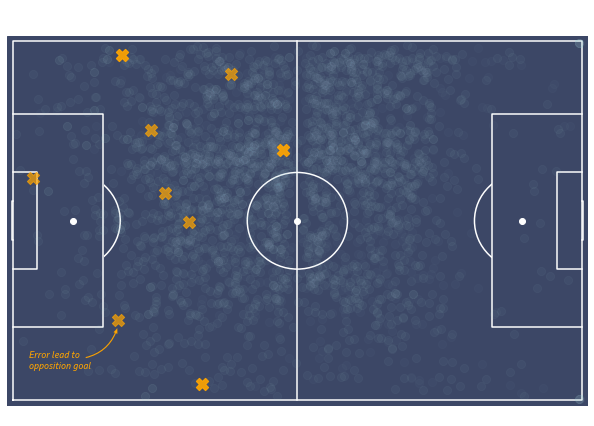

In [67]:
draw_pitch(pitch ='#3c4766', line ='white',orientation='horizontal', view='full')


csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

plt.scatter(passData['xM'],passData['yM'],color="lightblue", s=70, zorder=12, alpha=0.025)
plt.scatter(error['xM'],error['yM'],color="orange", marker='X',s=150, zorder=12, alpha=0.7)

style="Simple,tail_width=0.1,head_width=0.4,head_length=0.5"

plt.annotate('', (19.2,14),(13,8), zorder=10, arrowprops=dict(arrowstyle=style, connectionstyle="arc3,rad=0.3",
            linewidth=0.1,  color='orange',alpha=1))

plt.text(3,6, "Error lead to\nopposition goal", color='orange',fontsize=9, **csfont, style='italic')
info_string = 'Shaded area denotes favoured area of play'
plt.text(0, -3, info_string, color='white', ha='left', va='bottom', fontsize=7, **csfont, style='italic')


#title
plt.text(0,72, "Granit Xhaka", color='white',fontsize=17, fontweight='bold', **csfont)
subtitle_string = 'Arsenal | English Premier League | 2016/17-2019/20'
plt.text(0, 69.5, subtitle_string, fontsize=11,**csfont, color='white')
plt.figimage(img, 1535, 1080, alpha=.9, zorder=1)

info_string = '@jonollington'
plt.text(90.5, -3.5, info_string, color='white', ha='left', va='bottom', fontsize=11, **csfont)

plt.rcParams['axes.facecolor']='#3c4766'
plt.rcParams['savefig.facecolor']='#3c4766'

plt.savefig("xhaka_bad",bbox_inches="tight",dpi=200);

plt.show()


In [9]:
from PIL import Image

In [10]:
img = Image.open('./arsenal.png')
img.size

(411, 481)

In [11]:
img = img.resize((82, 96), Image.ANTIALIAS)

In [12]:
import matplotlib.patches as patches

In [13]:
def draw_pitch(pitch, line, orientation, view):
     
    orientation = orientation
    view = view
    line = line
    pitch = pitch
     
    if orientation.lower().startswith("h"):
         
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(69,105)
            plt.ylim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
     
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)
 
        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
         
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(69,105)
            plt.xlim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks
 
        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)
 
        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        return